# Read in netcdfs, and plot results

## should put stats in another notebook or make it into a function at least

In [1]:
import xarray as xr, matplotlib.pyplot as plt
from importlib import reload # need to use this if I edit a function file
import os
import numpy as np
import pandas as pd
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????
import dask.diagnostics # dask allows you to check how long something is taking to load
import climtas # needed to count event statistics with a specified duration
import seaborn as sns
import scipy.stats # to calculate correlation

In [2]:
# import custom functions
import sys 
sys.path.append('/home/563/kb6999/Functions') # use this if the function file is in a different directory to the notebook

import frequently_used_functions as func
import plotting_functions as fplot
import model_functions as funcM
import reanalysis_functions as funcR

# 20CR data

In [3]:
path = '/g/data/w48/kb6999/20CR_TMP_seasonal_data_for_plots/'

In [4]:
# open lat lon mean of temperature 
llm_Glob = xr.open_dataset(f'{path}llm_mon_Glob.nc')
llm_NH = xr.open_dataset(f'{path}llm_mon_NH.nc')
llm_SH = xr.open_dataset(f'{path}llm_mon_SH.nc')
llm_Aus = xr.open_dataset(f'{path}llm_mon_Aus.nc')
llm_EA = xr.open_dataset(f'{path}llm_mon_EA.nc')

In [5]:
# open multi member mean of temperature
mmm_mon_Glob = xr.open_dataset(f'{path}mmm_mon_Glob.nc')
mmm_mon_NH = xr.open_dataset(f'{path}mmm_mon_NH.nc')
mmm_mon_SH = xr.open_dataset(f'{path}mmm_mon_SH.nc')
mmm_mon_Aus = xr.open_dataset(f'{path}mmm_mon_Aus.nc')
mmm_mon_EA = xr.open_dataset(f'{path}mmm_mon_EA.nc')

In [6]:
# open percentile data for temperature
p10_mon_Glob = xr.open_dataset(f'{path}p10_mon_Glob.nc')
p10_mon_NH = xr.open_dataset(f'{path}p10_mon_NH.nc')
p10_mon_SH = xr.open_dataset(f'{path}p10_mon_SH.nc')
p10_mon_Aus = xr.open_dataset(f'{path}p10_mon_Aus.nc')
p10_mon_EA = xr.open_dataset(f'{path}p10_mon_EA.nc')

In [7]:
# open percentile data for temperature
p90_mon_Glob = xr.open_dataset(f'{path}p90_mon_Glob.nc')
p90_mon_NH = xr.open_dataset(f'{path}p90_mon_NH.nc')
p90_mon_SH = xr.open_dataset(f'{path}p90_mon_SH.nc')
p90_mon_Aus = xr.open_dataset(f'{path}p90_mon_Aus.nc')
p90_mon_EA = xr.open_dataset(f'{path}p90_mon_EA.nc')

### select out Krakatoa years 

In [8]:
# eruption date
e_date = [1883, 1902, 1963, 1982, 1991]
e_season = ['JJA', 'SON', 'MAM', 'MAM', 'JJA']

In [9]:
# save arrays of times relative to each eruption
e_pre5yrs = [e_date[i] - 5 for i, vals in enumerate(e_date)]
#e_pre3mon = e_date - 3
e_post5yrs = [e_date[i] + 5 for i, vals in enumerate(e_date)]

In [10]:
# Zoom in on Krakatoa time period
K_mmm_Glob = mmm_mon_Glob.sel(seasonyear = slice(e_pre5yrs[0], e_post5yrs[0]))
K_mmm_SH = mmm_mon_SH.sel(seasonyear = slice(e_pre5yrs[0], e_post5yrs[0]))
K_mmm_Aus = mmm_mon_Aus.sel(seasonyear = slice(e_pre5yrs[0], e_post5yrs[0]))
K_mmm_EA = mmm_mon_EA.sel(seasonyear = slice(e_pre5yrs[0], e_post5yrs[0]))

K_p10_Glob = p10_mon_Glob.sel(seasonyear = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p10_SH = p10_mon_SH.sel(seasonyear = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p10_Aus = p10_mon_Aus.sel(seasonyear = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p10_EA = p10_mon_EA.sel(seasonyear = slice(e_pre5yrs[0], e_post5yrs[0]))

K_p90_Glob = p90_mon_Glob.sel(seasonyear = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p90_SH = p90_mon_SH.sel(seasonyear = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p90_Aus = p90_mon_Aus.sel(seasonyear = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p90_EA = p90_mon_EA.sel(seasonyear = slice(e_pre5yrs[0], e_post5yrs[0]))

## Figures

In [11]:
# define degree sign
deg = u'\N{DEGREE SIGN}'

In [12]:
fplot=reload(fplot)

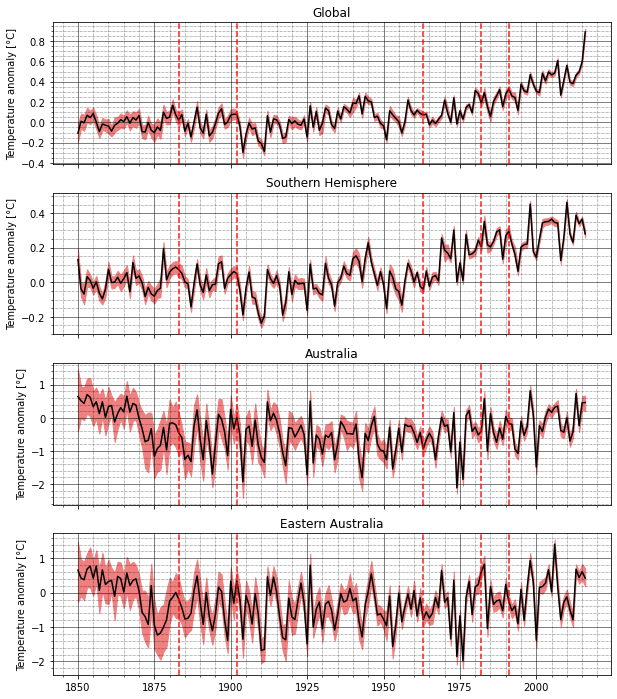

In [13]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(10,12)) # make a figure

with dask.diagnostics.ProgressBar():
    fplot.timeseries_graph(mmm_mon_Glob.sel(season='DJF').tmp, p10_mon_Glob.sel(season='DJF').tmp, p90_mon_Glob.sel(season='DJF').tmp, ax = axes[0], color='lightcoral')
    fplot.timeseries_graph(mmm_mon_SH.sel(season='DJF').tmp, p10_mon_SH.sel(season='DJF').tmp, p90_mon_SH.sel(season='DJF').tmp, ax = axes[1], color='lightcoral')
    fplot.timeseries_graph(mmm_mon_Aus.sel(season='DJF').tmp, p10_mon_Aus.sel(season='DJF').tmp, p90_mon_Aus.sel(season='DJF').tmp, ax = axes[2], color='lightcoral')
    fplot.timeseries_graph(mmm_mon_EA.sel(season='DJF').tmp, p10_mon_EA.sel(season='DJF').tmp, p90_mon_EA.sel(season='DJF').tmp, ax = axes[3], color='lightcoral')

axes[0].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Global') 
axes[1].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Southern Hemisphere')
axes[2].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Australia')
axes[3].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Eastern Australia')

#fig.suptitle('Time series of temperature anomalies', size=16)

#fig.tight_layout() # makes titles overlap, but is meant to stops things from overlapping and makes the figure more compact

plt.savefig('R_timeseries_DJF_tmp_stacked.png', dpi=300, bbox_inches='tight')

In [16]:
# use this to set the x-ticks for each month from 5 years before to 5 years after the eruption
months = pd.date_range(e_pre5yrs[0], e_post5yrs[0], freq='MS')
years = pd.date_range(e_pre5yrs[0], e_post5yrs[0], freq='YS')

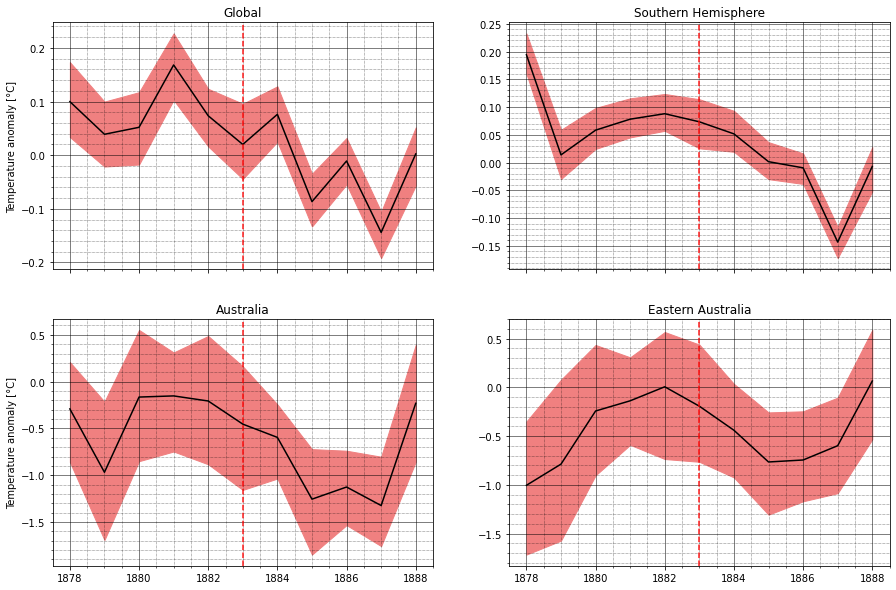

In [24]:
# Monthly temperature anomalies for Krakatoa
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15,10)) # make a figure

# make subplots for each region
fplot.timeseries_graph(K_mmm_Glob.sel(season='DJF').tmp, K_p10_Glob.sel(season='DJF').tmp, K_p90_Glob.sel(season='DJF').tmp, ax = axes[0,0], color='lightcoral')
fplot.timeseries_graph(K_mmm_SH.sel(season='DJF').tmp, K_p10_SH.sel(season='DJF').tmp, K_p90_SH.sel(season='DJF').tmp, ax = axes[0,1], color='lightcoral')
fplot.timeseries_graph(K_mmm_Aus.sel(season='DJF').tmp, K_p10_Aus.sel(season='DJF').tmp, K_p90_Aus.sel(season='DJF').tmp, ax = axes[1,0], color='lightcoral')
fplot.timeseries_graph(K_mmm_EA.sel(season='DJF').tmp, K_p10_EA.sel(season='DJF').tmp, K_p90_EA.sel(season='DJF').tmp, ax = axes[1,1], color='lightcoral')

# set axis labels and subplot titles
axes[0,0].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Global') 
axes[0,1].set(title = 'Southern Hemisphere')
axes[1,0].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Australia')
axes[1,1].set(title = 'Eastern Australia')

# hadcrut5_llm_Aus.sel(time = slice(e_pre5yrs[0], e_post5yrs[0])).plot(ax=axes[1,0])

# set the axis ticks to be yearly 
# axes[0,0].set_xticks(years)
# axes[0,0].set_xticklabels(years.year) # .year displays only the year (not month time etc)

plt.savefig('R_K_timeseries_DJF_tmp.png', dpi=300, bbox_inches='tight')

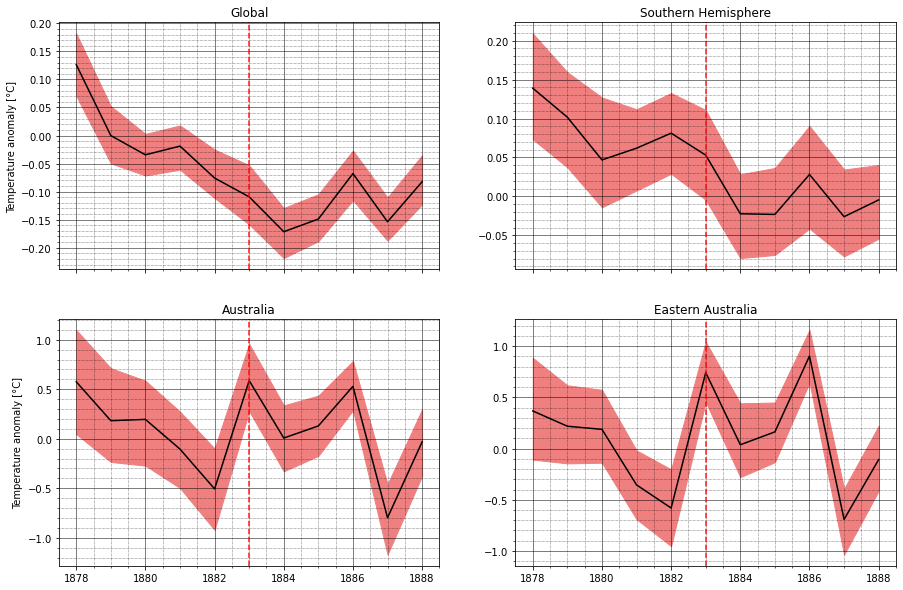

In [23]:
# Monthly temperature anomalies for Krakatoa
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15,10)) # make a figure

# make subplots for each region
fplot.timeseries_graph(K_mmm_Glob.sel(season='JJA').tmp, K_p10_Glob.sel(season='JJA').tmp, K_p90_Glob.sel(season='JJA').tmp, ax = axes[0,0], color='lightcoral')
fplot.timeseries_graph(K_mmm_SH.sel(season='JJA').tmp, K_p10_SH.sel(season='JJA').tmp, K_p90_SH.sel(season='JJA').tmp, ax = axes[0,1], color='lightcoral')
fplot.timeseries_graph(K_mmm_Aus.sel(season='JJA').tmp, K_p10_Aus.sel(season='JJA').tmp, K_p90_Aus.sel(season='JJA').tmp, ax = axes[1,0], color='lightcoral')
fplot.timeseries_graph(K_mmm_EA.sel(season='JJA').tmp, K_p10_EA.sel(season='JJA').tmp, K_p90_EA.sel(season='JJA').tmp, ax = axes[1,1], color='lightcoral')

# set axis labels and subplot titles
axes[0,0].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Global') 
axes[0,1].set(title = 'Southern Hemisphere')
axes[1,0].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Australia')
axes[1,1].set(title = 'Eastern Australia')

# hadcrut5_llm_Aus.sel(time = slice(e_pre5yrs[0], e_post5yrs[0])).plot(ax=axes[1,0])

# set the axis ticks to be yearly 
# axes[0,0].set_xticks(years)
# axes[0,0].set_xticklabels(years.year) # .year displays only the year (not month time etc)

plt.savefig('R_K_timeseries_JJA_tmp.png', dpi=300, bbox_inches='tight')